In [2]:
import pandas as pd
import numpy as np
import nltk
import re
#importing stopwords is optional, in this case it decreased accuracy
#from nltk.corpus import stopwords
import itertools
import json
import time
import datetime


In [32]:
start_time = time.time()
data = pd.read_csv('text_emotion.csv')
#data = data.iloc[:100,:]
#stopset = set(stopwords.words('english'))

from nltk.stem.wordnet import WordNetLemmatizer 
lem = WordNetLemmatizer()

In [33]:
-

In [34]:
print(type(data['content']))
data

<class 'pandas.core.series.Series'>


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,"[i, know, i, be, listenin, to, bad, habit, ear..."
1,1956967666,sadness,wannamama,"[n, bed, with, a, headache, ughh, waitin, on, ..."
2,1956967696,sadness,coolfunky,"[ceremony, gloomy, friday]"
3,1956967789,enthusiasm,czareaquino,"[to, hang, out, with, friends, SOON]"
4,1956968416,neutral,xkilljoyx,"[We, want, to, trade, with, someone, who, have..."
5,1956968477,worry,xxxPEACHESxxx,"[Re, ping, why, didn, t, you, go, to, prom, BC..."
6,1956968487,sadness,ShansBee,"[should, be, sleep, but, im, not, think, about..."
7,1956968636,worry,mcsleazy,"[be, down]"
8,1956969035,sadness,nic0lepaula,"[Charlene, my, love, I, miss, you]"
9,1956969172,sadness,Ingenue_Em,"[I, m, sorry, at, least, it, s, Friday]"


In [30]:
#From dropping a data
#data = data.drop(columns="area") 
#iris.drop(iris.index[[1,3,5,7]])

In [39]:
newData = data.drop(data.index[1500:])

In [40]:
newData

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,"[i, know, i, be, listenin, to, bad, habit, ear..."
1,1956967666,sadness,wannamama,"[n, bed, with, a, headache, ughh, waitin, on, ..."
2,1956967696,sadness,coolfunky,"[ceremony, gloomy, friday]"
3,1956967789,enthusiasm,czareaquino,"[to, hang, out, with, friends, SOON]"
4,1956968416,neutral,xkilljoyx,"[We, want, to, trade, with, someone, who, have..."
5,1956968477,worry,xxxPEACHESxxx,"[Re, ping, why, didn, t, you, go, to, prom, BC..."
6,1956968487,sadness,ShansBee,"[should, be, sleep, but, im, not, think, about..."
7,1956968636,worry,mcsleazy,"[be, down]"
8,1956969035,sadness,nic0lepaula,"[Charlene, my, love, I, miss, you]"
9,1956969172,sadness,Ingenue_Em,"[I, m, sorry, at, least, it, s, Friday]"


In [41]:
newData = newData.reset_index(drop=True)
for i in range(len(newData)):
    words = newData.content[i][0]
    for j in range(len(newData.content[i])-1):
        words+= ' ' + newData.content[i][j+1]
    newData.content[i] = words

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(newData.content, newData.sentiment, test_size=0.25, random_state=0)

x_train = x_train.reset_index(drop = True)
x_test = x_test.reset_index(drop = True)

y_train = y_train.reset_index(drop = True)
y_test = y_test.reset_index(drop = True)

In [95]:
vectorizer = TfidfVectorizer(min_df=3, max_df=0.9)

%time train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

model = svm.SVC(kernel='linear') 
model.fit(train_vectors, y_train) 
predicted_sentiment = model.predict(test_vectors)

print(classification_report(y_test, predicted_sentiment))

CPU times: user 29.9 ms, sys: 1.76 ms, total: 31.6 ms
Wall time: 30.1 ms
             precision    recall  f1-score   support

      anger       0.00      0.00      0.00         2
    boredom       0.00      0.00      0.00         4
      empty       0.00      0.00      0.00         7
 enthusiasm       0.00      0.00      0.00         5
        fun       0.00      0.00      0.00         8
  happiness       0.00      0.00      0.00        13
       hate       0.00      0.00      0.00        25
       love       1.00      0.07      0.13        14
    neutral       0.37      0.37      0.37        92
     relief       0.00      0.00      0.00         6
    sadness       0.33      0.39      0.36        80
   surprise       0.00      0.00      0.00        17
      worry       0.30      0.55      0.39       102

avg / total       0.28      0.33      0.28       375



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [96]:
predicted_sentiments = []
for s in range(len(predicted_sentiment)):
    predicted_sentiments.append(predicted_sentiment[s])
    
prediction_df = pd.DataFrame({'Content':x_test, 'Emotion_predicted':predicted_sentiment, 'Emotion_actual': y_test})
prediction_df.to_csv('emotion_recognizer_svm.csv', index = False)

elapsed_time = time.time() - start_time
print ("processing time:", elapsed_time, "seconds")

processing time: 10859.314853906631 seconds


In [107]:
tempTrainV = train_vectors.toarray()
tempTestV = test_vectors.toarray()

In [104]:
import matplotlib.pyplot as plt

In [113]:
plt.plot(vectorizer.transform(x_train).toarray())

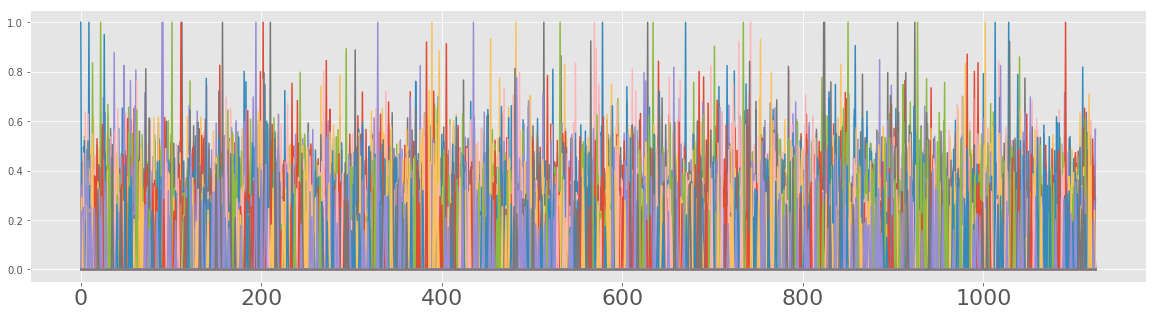

In [114]:
plt.show()